In [10]:
#import and preprocessing the dataset
import pandas as pd
df = pd.read_csv("/content/Housing.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [13]:
#one-hot coding
df_encoded = pd.get_dummies(df,drop_first = True)

In [14]:
#Splitting the data into train and test datasets
from sklearn.model_selection import train_test_split
X = df_encoded.drop('price', axis = 1)
y = df_encoded['price']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(436, 13) (109, 13) (436,) (109,)


In [15]:
#Fitting a linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
#Evaluating model using MAE, MSE, R2
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test,y_pred))
print("MSE:", mean_squared_error(y_test,y_pred))
print("R2:",r2_score(y_test,y_pred))


MAE: 970043.4039201636
MSE: 1754318687330.6638
R2: 0.6529242642153184


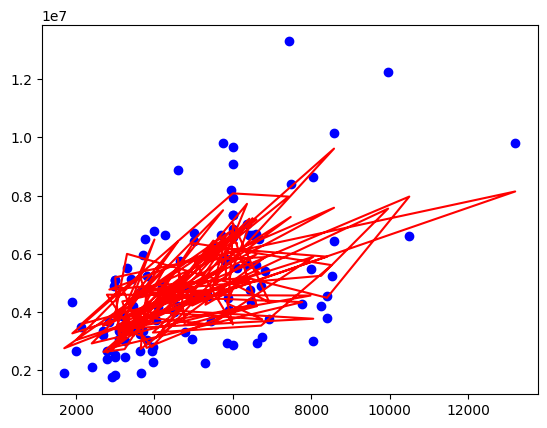

In [25]:
#plot regression lien and interpret coefficients
import matplotlib.pyplot as plt
plt.scatter(X_test['area'], y_test, color = 'blue')
plt.plot(X_test['area'], y_pred, color = 'red')


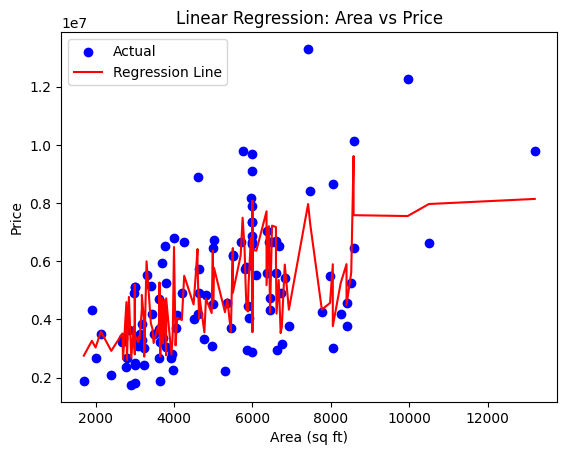

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Sort values by 'area' for a proper regression line
sorted_indices = X_test['area'].argsort()
x_sorted = X_test['area'].values[sorted_indices]
y_sorted = y_pred[sorted_indices]

plt.scatter(X_test['area'], y_test, color='blue', label='Actual')  # Blue dots = actual
plt.plot(x_sorted, y_sorted, color='red', label='Regression Line')  # Red line = prediction

plt.xlabel("Area (sq ft)")
plt.ylabel("Price")
plt.title("Linear Regression: Area vs Price")
plt.legend()
plt.show()


In [27]:
# Print coefficients
coef_df = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_})
print(coef_df)


                            Feature   Coefficient
0                              area  2.359688e+02
1                          bedrooms  7.677870e+04
2                         bathrooms  1.094445e+06
3                           stories  4.074766e+05
4                           parking  2.248419e+05
5                      mainroad_yes  3.679199e+05
6                     guestroom_yes  2.316100e+05
7                      basement_yes  3.902512e+05
8               hotwaterheating_yes  6.846499e+05
9               airconditioning_yes  7.914267e+05
10                     prefarea_yes  6.298906e+05
11  furnishingstatus_semi-furnished -1.268818e+05
12     furnishingstatus_unfurnished -4.136451e+05
